# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
    
---
* [Numpy,Scipy,Scikit-image, PIL를 통한 기본 영상 처리5](#Numpy,Scipy,Scikit-image,-PIL를-통한-기본-영상-처리5)
    * [einsum](#einsum)
      * [Vector Multiplication](#Vector-Multiplication)
      * [Matrix](#Matrix)
          * [Diagonal](#Diagonal)
          * [Trace](#Trace)
      * [Vector, Matrix Multiplication](#Vector,-Matrix-Multiplication)
      * [ Matrix Multiplication](#Matrix-Multiplication)
          * [Batch Matrix Multiplication](#Batch-Matrix-Multiplication)
      * [Ellipsis](#Ellipsis)
* [OPENCV를 활용한 영상 처리1](#OPENCV를-활용한-영상-처리1)
  * [OpenCV](#OpenCV)
  * [ OpenCV 머신러닝 맛보기](#OpenCV-머신러닝-맛보기)

---
## Numpy,Scipy,Scikit-image, PIL를 통한 기본 영상 처리5
## einsum
- Einstein Summation Notation 아인슈타인 표기법 이용 벡터,행렬,텐서의 복잡한 연산을 통일된 방법으로 간략화
    - 두 벡터의 내적 $c = \sum_{i=1}^N a_i b_i$ 표기를 $c = a_i b_i$ 와 같이 표기
- `einsum(" , , -> ", arg1,arg2,arg3)`와 같이 작성
    - 두 벡터의 내적 : einsum('i,j->' a,b)
- Numpy, TensorFlow, Pytorch 에서 최적화됨 
- 이전에는 원그리기에 사용했지만 딥러닝에 loss 함수에 사용함

텐서플로우 공실문서 참고 : https://www.tensorflow.org/tutorials/generative/style_transfer?hl=ko#%EC%8A%A4%ED%83%80%EC%9D%BC_%EA%B3%84%EC%82%B0%ED%95%98%EA%B8%B0

- Numpy.pdf 참고 

In [1]:
import numpy as np
a= np.array([1,2,3])

### Vector Multiplication
### Vector Hadamard product
- 동일한 위치의 원소간의 곱(Element-wise Multiplication)
- $a_i◦b_i=c_i$ 
    - a,b는 shape이 동일 해야함

In [2]:
np.einsum('i,i->i',a,a)  # 동일한 위치의 값을 제곱 [1*1, 2*2, 3*3]=[1,4,9]

array([1, 4, 9])

In [3]:
a*a

array([1, 4, 9])

### Vector inner product
- 벡터간의 내적
- $c=a_ib_i$ 

In [4]:
np.einsum('i,i->',a,a)  #각 값의 제곱한 것의 합: 1*1+2*2+3*3= 1+4+9 = 14

14

In [5]:
a@a

14

In [6]:
np.dot(a,a)

14

#### vector,  outer product
- 외적
- $C_{ij}=a_ib_j$ 

In [7]:
np.einsum('i,j->ij',a,a)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [8]:
np.outer(a,a)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

#### ->
- 곱의 합

외적의 합

In [9]:
np.einsum('i,j->',a,a )  #(1*1+1*2+ 1*3 )+(2*1+2*2+2*3)+ (3*1+3*2+ 3*3) =36

36

In [10]:
np.outer(a,a).sum()

36

### Matrix 

In [11]:
B= np.arange(6).reshape(2,3)
a,B

(array([1, 2, 3]),
 array([[0, 1, 2],
        [3, 4, 5]]))

In [12]:
np.einsum('ij->ij',B)  #그대로

array([[0, 1, 2],
       [3, 4, 5]])

#### Transpose 
- 전치행렬 $B_{ij} = A_{ji}$
- 행과 열의 위치가 서로 바뀜

In [13]:
np.einsum('ab->ba',B) #전치행렬

array([[0, 3],
       [1, 4],
       [2, 5]])

In [14]:
B.T  #상동

array([[0, 3],
       [1, 4],
       [2, 5]])

#### Diagonal
- 대각 원소 ( 원소의 위치가행과 열이 동일한 경우)
- 정방행렬인 경우 가능

In [15]:
B=np.arange(1,5).reshape(2,2)

In [16]:
np.einsum('ii->i',B) #대각 원소 (행열 크기 동일해야함)

array([1, 4])

In [17]:
B.diagonal()

array([1, 4])

#### Trace
- 행렬의 대각합 (대각원소의 합) 
- $A_{ii}$

In [18]:
np.einsum('ii->',B) # 대각원소의 합(->)

5

In [19]:
B

array([[1, 2],
       [3, 4]])

#### Sum
- 전체 합
- $ B_{ij}$

In [20]:
np.einsum('ij->',B)

10

In [21]:
B.sum()

10

#### Row sum
- 행 합
-  $ b_{i}$

In [22]:
np.einsum('ij->i',B)

array([3, 7])

In [23]:
B.sum(axis=1)

array([3, 7])

#### Column sum
- 열 합
-  $ b_{j}$

In [24]:
np.einsum('ij->j',B)

array([4, 6])

In [25]:
B.sum(axis=0)

array([4, 6])

### Vector, Matrix Multiplication
- ab,b ->a   left multiplication 
- a,ab->b    right multiplication

### vector, matrix inner product
- left multiplication
    - $c_i = B_{ij} a_j$
- right multiplication
    - $c_j = a_i B_{ij}$

In [26]:
a=np.arange(1,4)
B=np.arange(1,7).reshape(2,3)

np.einsum("ij,j->i", B, a) #left multiplication & 행 합

array([14, 32])

In [27]:
B*a #vector broadcasting

array([[ 1,  4,  9],
       [ 4, 10, 18]])

In [28]:
B*a

array([[ 1,  4,  9],
       [ 4, 10, 18]])

In [29]:
(B*a).sum(axis=1) 

array([14, 32])

In [30]:
np.einsum('ij,j->j',B,a)  #left multiplication & 열 합

array([ 5, 14, 27])

In [31]:
(B*a).sum(axis=0)  #열합

array([ 5, 14, 27])

In [32]:
np.einsum("i,ij->j", a,B.T) #right multiplication 행합

array([14, 32])

In [33]:
(a*B).sum(axis=1) 

array([14, 32])

In [34]:
a@B.T 

array([14, 32])

In [35]:
np.einsum("i,ij->i", a,B.T) 

array([ 5, 14, 27])

In [36]:
(a*B).sum(axis=0)     #right multiplication  열합

array([ 5, 14, 27])

In [37]:
np.einsum('ij,j->',B,a)  # multiplication 결과의 전체 합

46

### Matrix Multiplication
#### Matrix inner product
- 행렬 내적 
- $D_{ij} = B_{ik}C_{kj}$

In [38]:
B=np.arange(4).reshape(2,2)
C=np.arange(1,5).reshape(2,2)
B,C

(array([[0, 1],
        [2, 3]]),
 array([[1, 2],
        [3, 4]]))

In [39]:
np.einsum('ik,kj->ij',B,C)

array([[ 3,  4],
       [11, 16]])

In [40]:
B@C

array([[ 3,  4],
       [11, 16]])

In [41]:
np.dot(B,C)

array([[ 3,  4],
       [11, 16]])

In [42]:
np.einsum('ik,kj->',B,C)  #내적의 합

34

In [43]:
np.einsum('ik,kj->ik',B,C)

array([[ 0,  7],
       [ 6, 21]])

In [44]:
B*C

array([[ 0,  2],
       [ 6, 12]])

#### Hadamard product (element-wise)

In [45]:
np.einsum('ij,ij->ij', B,C)

array([[ 0,  2],
       [ 6, 12]])

#### Batch Matrix Multiplication
- 배치 행렬곱
- 데이터 활용할 때 Y 개 만큼 a x b 가 있다(NHW format)
    - $c_{n,c,d} = \sum_{ij} A_{n,i,j,c} B_{n,i,j,d}$
    -  n 없다고 생각하면 행렬곱과 동일함

In [46]:
def gram_matrix(input_tensor):
                            #'bijc,bijd->bcd' 4차원을 3차원으로 만듦
  result = tf.linamlg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

In [47]:
## Batched Matrix Multiplication
A = np.random.random(size=(3,10,4))
B = np.random.random(size=(3,4, 8))
np.einsum('bik,bkj->bij',A, B)

array([[[1.5417546 , 1.68741084, 0.8684148 , 0.76562851, 0.85437789,
         1.10206535, 1.7080623 , 1.75575501],
        [1.13689844, 1.34701395, 0.7266393 , 0.76192932, 0.69111853,
         1.20164018, 1.54566359, 1.44654534],
        [1.00355254, 1.12968637, 0.4146201 , 0.45271255, 0.46674255,
         0.75930772, 1.1581142 , 1.0768864 ],
        [0.62226923, 0.78187403, 0.56933278, 0.42039791, 0.59135783,
         0.96593214, 0.82791815, 0.81558738],
        [0.73444507, 0.90977023, 0.70516038, 0.74639809, 0.55692776,
         0.98546806, 1.21646196, 1.16609142],
        [0.99262438, 1.11565618, 0.89574109, 0.748136  , 0.75001527,
         0.94937629, 1.26659097, 1.38130863],
        [1.43992007, 1.57992156, 0.7085268 , 0.58061838, 0.78637919,
         1.03775181, 1.49780827, 1.5168637 ],
        [1.15850101, 1.21361789, 0.97752602, 0.82192353, 0.75264058,
         0.71833422, 1.35583537, 1.575345  ],
        [1.16559751, 1.25245664, 0.7088084 , 0.59860358, 0.66206931,
         0.

In [48]:
A=np.arange(24).reshape(6,1,1,4)
B=np.arange(18).reshape(6,1,1,3)
np.einsum('...ijc,...ijd->...cd', A,B).shape

(6, 4, 3)

In [49]:
np.einsum('bijc,bijd->bcd', A,B)

array([[[  0,   0,   0],
        [  0,   1,   2],
        [  0,   2,   4],
        [  0,   3,   6]],

       [[ 12,  16,  20],
        [ 15,  20,  25],
        [ 18,  24,  30],
        [ 21,  28,  35]],

       [[ 48,  56,  64],
        [ 54,  63,  72],
        [ 60,  70,  80],
        [ 66,  77,  88]],

       [[108, 120, 132],
        [117, 130, 143],
        [126, 140, 154],
        [135, 150, 165]],

       [[192, 208, 224],
        [204, 221, 238],
        [216, 234, 252],
        [228, 247, 266]],

       [[300, 320, 340],
        [315, 336, 357],
        [330, 352, 374],
        [345, 368, 391]]])

In [55]:
np.einsum('...ijc,...ijd->...cd', A,B).shape

(6, 4, 3)

In [50]:
np.einsum('...ijc,...ijd->...cd', A,B)

array([[[  0,   0,   0],
        [  0,   1,   2],
        [  0,   2,   4],
        [  0,   3,   6]],

       [[ 12,  16,  20],
        [ 15,  20,  25],
        [ 18,  24,  30],
        [ 21,  28,  35]],

       [[ 48,  56,  64],
        [ 54,  63,  72],
        [ 60,  70,  80],
        [ 66,  77,  88]],

       [[108, 120, 132],
        [117, 130, 143],
        [126, 140, 154],
        [135, 150, 165]],

       [[192, 208, 224],
        [204, 221, 238],
        [216, 234, 252],
        [228, 247, 266]],

       [[300, 320, 340],
        [315, 336, 357],
        [330, 352, 374],
        [345, 368, 391]]])

#### Ellipsis
- `...` 를 가리킴
- 2차원 이상 사용가능 
- `:,:`

In [53]:
np.einsum('...jl,...ik',A,B).shape

(6, 1, 1, 1, 3, 4)

In [58]:
x=np.arange(24).reshape(2,3,4) #3차원
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [59]:
x[0,:,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [60]:
x[0,...]#상동

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [61]:
x[0]   #상동

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [62]:
x[:,:,0]

array([[ 0,  4,  8],
       [12, 16, 20]])

In [27]:
...

Ellipsis

In [63]:
x[...,0] #상동

array([[ 0,  4,  8],
       [12, 16, 20]])

In [64]:
x.shape

(2, 3, 4)

In [65]:
np.einsum('...i',x) # 전체

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [66]:
np.einsum('...i->...i',x) 

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [67]:
np.einsum('...ij->...ij',x) 

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [68]:
np.einsum('...ij->...j',x) #열합

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [69]:
np.einsum('...ij->...i',x) #행합

array([[ 6, 22, 38],
       [54, 70, 86]])

In [74]:
y=np.arange(18).reshape(2,3,3)
y

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

In [71]:
np.einsum('...i->...i',y) 

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

In [72]:
np.einsum('...ii->...i',y) #차원 줄어들면서 각 행렬의 대각원소를 가져옴

array([[ 0,  4,  8],
       [ 9, 13, 17]])

In [73]:
np.einsum('k...',y) #각 행렬의 행끼리 

array([[[ 0,  9],
        [ 1, 10],
        [ 2, 11]],

       [[ 3, 12],
        [ 4, 13],
        [ 5, 14]],

       [[ 6, 15],
        [ 7, 16],
        [ 8, 17]]])

In [85]:
x=np.arange(6).reshape(3,2)  #3x2
y=np.arange(12).reshape(4,3) #4x3

In [74]:
x, y

(array([[0, 1],
        [2, 3],
        [4, 5]]),
 array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]]))

In [85]:
np.einsum('...ik',x)# 그대로

array([[0, 1],
       [2, 3],
       [4, 5]])

In [34]:
np.einsum('...k',x) #그대로

array([[0, 1],
       [2, 3],
       [4, 5]])

In [33]:
np.einsum('ki',x) # transpose 

array([[0, 2, 4],
       [1, 3, 5]])

In [35]:
np.einsum('k...',x) #전치

array([[0, 2, 4],
       [1, 3, 5]])

In [75]:
np.einsum('...k,ki',y,x)  #크기가 맞음  (4,3) @(3,2)=(4,2) 

array([[10, 13],
       [28, 40],
       [46, 67],
       [64, 94]])

In [82]:
np.einsum('ki,...k',x,y)

array([[10, 13],
       [28, 40],
       [46, 67],
       [64, 94]])

In [61]:
y@x

array([[10, 13],
       [28, 40],
       [46, 67],
       [64, 94]])

In [70]:
np.einsum('ki,...k->i...',x,y)   #  2x3 @ (4x3).T = 2x4

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [60]:
x.T@y.T

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [94]:
np.einsum('k...,jk',x,y)

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [96]:
np.einsum('ki,...k->i...',x,y) #row vs col summation 

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [74]:
np.einsum('k...,ik',y,x)  #크기가 맞지 않음  (4,3).T @(3,2)=(3,4)@(3,2) 불가

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (4,3)->(3,newaxis,4) (3,2)->(3,2) 

In [32]:
np.einsum('ii',x) #정방행렬이 아니기 때문에 에러..

ValueError: dimensions in operand 0 for collapsing index 'i' don't match (3 != 2)

In [56]:
np.einsum('ki,k...',x,x)

array([[20, 26],
       [26, 35]])

In [58]:
x.T@x

array([[20, 26],
       [26, 35]])

In [100]:
np.einsum('...jl,...ik',x,y).shape 

(4, 3, 3, 2)

### Neural Network 만들기
- broadcasting 가능
    - 참고:https://pytorch.org/docs/stable/generated/torch.einsum.html
- tensor, Numpy 에서는 `...` 은 1개 이상의`:` 과 동일함
    - 뒤에  `...` Ellipsis(연산자 오버로딩) or `:` 만 있는 경우 생략 가능

- perceptron: $Wx+b$를 `einsum` 으로 신경망 구현 가능 

In [ ]:
#Feedforwad Propagation ; i input, h hidden, o output dimension label
ha=np.einsum('hi,i ->h',W,x)+b
h=simoid(ha)
ya=np.einsum('oh,o ->h',V,h)+c
y=softmax(ha)

 ---
 ## OPENCV를 활용한 영상 처리1
 ## openCV
- PIL 
    - pytorch, tf 
    - 한글 폰트 사용 
    - 메타 정보 알기위해서 
    - Numpy와 호환 되지만 array programming 이 아닌 객체지향 방식 사용
- Scikit-image
    -  Numpy기반으로 각 분야에서 많이 사용함
- openCV 
    - **video 처리까지 가능하여 사용 범위 넒음**
    - **image 기반의 ml/dl 기능 지원**
    - UI 제공( event 처리)
    - cuda GPU 지원(compile 해야함)
    - :( 한글 지원 안 함(compile 해야함)
    -  c에서 그대로 porting 함

In [112]:
from sklearn.datasets import load_digits #mnist 축소판

In [113]:
data=load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [114]:
dir(data) 

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [115]:
data.images #numpy format

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

numpy format 이면 `shape`, `dtype` 확인
- NHW format( 8x8크기의 1797 개의 이미지), float64 
    - uint8 아닌 이유는 intensity 로 이미지 표현

In [121]:
data.images.shape, data.images.dtype

((1797, 8, 8), dtype('float64'))

In [124]:
data.images[0,:,:] #상동

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [123]:
data.images[0,...] #0번째 그림

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [125]:
data.images[0]      #상동

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

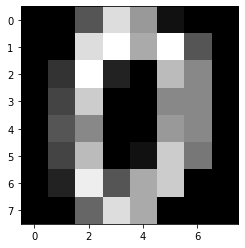

In [127]:
import matplotlib.pyplot as plt
plt.imshow(data.images[0],cmap='gray') # 위의 데이터 그림

이미지 데이터로 전통적인 머신러닝을 이용한 예측 모델 만들기 가능 
### 전통적인 머신러닝 
- 한줄에 1개의 dataset으로 들어감
- batch=1 :  데이터 한개 넣고 결과값 하고 정답하고 비교해서 업데이트
-  batch=3: 데이터 3개 넣고 결과값하고 정답하고 비교해서 업데이트
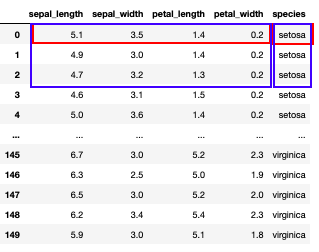
- 0번째의 5.1,3.5,1.4,0.2 를 모델에 넣으면 정답은 setosa 
- loss : 정답과 예측간 차이

기계학습목적: 모델의 파라미터/non parametric 방식을 통해서 loss 최소화하는 것을 찾음
   - perceptron 인경우 W,b찾음
   
조건 : 
- 데이터 컬럼당 들어가는 갯수는 1개
- 결측치 없어야함
- 동일한 크기
- 정형 데이터: 컬럼 간 순서를 바꾸면 성능 차이가 안 나는 데이터 (feature selction)
    - 비정형데이터: 이미지는 순서 바꾸면 의미가 바뀌어 성능 차이남 
- 대부분 머신러닝 기법들은 정형데이터를 위해서 만들어짐 
- domain 에 인공지능 적용

비정형데이터를 정형데이터 기반으로 바꾸어 하였더니 성능이 어느 정도 나왔었음 (많은 조건을 만족해야함)

---

In [128]:
import seaborn as sns
iris= sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


비정형데이터를 ml에 사용하려면

이미지는 전체 데이터 자체에 의미가 있음

1. 1줄에 1의 데이터셋인 정형데이터처럼 만들어야함 (정형화 아님)
- flatten 이랑 상관 있음
이미지,자연어 , 음성도 전통적인 머신러닝 기법을 사용하려면 하나의 데이터는 
- tidy data
    - 컬럼 한개에 데이터 한개
    - 분석에 좋은 데이터
- 컴퓨터는 순서 상관없이 5.1, 3.5, 1.3, 0.2 가 setosa(1) 애 의미를 모르기 때문에 크고 작음의 패턴으로 탐색
- 실제 컴퓨터 세상에서는 메모리 1열 이며 strides 로 2차원 이상을 표현
- 이미지 한장을 전체 한줄씩 넣으면 최소한 이미지도 일반적인 머신러닝 데이터 세트롤 구성가능

- 기본 >시간,자연어 > 음성

- 이미지를 전통적인 머신러닝 기법에 적용시키기 위해서 이미지 색상따라 차원다름
- n개의 이미지(2차원 이상)를 n개의 1차원으로 바꿔줘야함
각 row 가 데이터셋 개념이나 이미지는 전체가 데이터이기 때문에 1차원으로 변경


In [129]:
data.images.shape #1797 개의 8 x 8(2차원)

(1797, 8, 8)

In [130]:
data.images.reshape(-1,8*8) #1차원 데이터 1797개 (1797,64)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [131]:
data.images.reshape(-1,8*8).shape #1차원 데이터 1797개 

(1797, 64)

- tf의 Faltten : 데이터 한개 씩만 Flatten 함 
    - `tf.keras.layers.Flatten(input_shape=(28,28)``
    - 데이터 28x28 1개가 들어왔을때 flatten 

In [132]:
data.images.flatten() #copy

array([ 0.,  0.,  5., ..., 12.,  1.,  0.])

In [133]:
data.images.flatten().shape # 전체 데이터를 1차원 1797*8*8

(115008,)

In [134]:
data.images.ravel() #view ->볼레로 ㅂ 

array([ 0.,  0.,  5., ..., 12.,  1.,  0.])

In [138]:
np.roll(data.images ,(1,)).shape

(1797, 8, 8)

In [139]:
#첫번째 데이터 
for i in data.images:  
    print(i)
    break

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [140]:
#내부적으로 flatten 하는 방법도 있지만 해당 수업에서는 einsum 이용
for i in data.images:  
    print(i.flatten())
    break

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [147]:
np.einsum('ijk->i',data.images ).shape

(1797,)

In [149]:
n_img=data.images.reshape(-1,8*8)
n_img

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [150]:
n_img/16

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

#### 이미지 전처리
- scaler 
    - 영상에서는 고유의 특성을 잃으면 안 되기 때문에 scaler 중요
    - MinMaxSacler 
- 정형데이터에서의 차원 축소를 사용 할 수 없음  
    - feature selection
        - 정형데이터에서 변수 줄임
        - 비정형데이터에서는 못함(의미가 바뀜)
    - PCA 
        - 원래값을 대표할 수 있는 새로운 축으로 나타냄
        - 비정형데이터 에서는 그림이 변형됨

### mnist 데이터 특징
- 모든 데이터가 꽉차게 정가운데에 맞추어져 있음
- 배경이 없어 왜곡 없음( 검정색 바탕색상)
- 흑백 이미지:intensity 크기로 구분
    - 차원의 저주: 색상 데이터를 사용하면 동일한 데이터에 차원이 늘어남 
- 각각 1차원 만들어서 2차원 구조로 만들면 머신러닝에 사용 가능

성능 향상됨

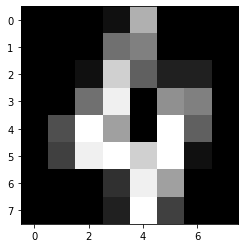

In [152]:
plt.imshow(data.images[4],cmap='gray')

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
#간단한 예시로 hold-out 없이 보여주기위해 하단과 같이 작성
knn=KNeighborsClassifier()    #모델 인스턴스화
knn.fit(n_img, data.target)   #모댈 학습

KNeighborsClassifier()

In [162]:
knn.predict((data.images[4].reshape(1,-1))) #모델 예측 :4로 맞춤 (정답!)

array([4])

영상관점에서의 머신러닝
 
 문제점
- 1 열로 입력했기 때문에 이미지를 컴퓨터는 크기로만 알기 때문에 사람 인식시에 배경이 있으면 인식 힘듦
1차원으로 바꾸면 2차원에서의 인접한 위치 관련 정보를 모름 

대부분의 분야에서는 전통적인 방식 선호
- 투입산출 
- 성능: 데이터가 작을때  전통적인 모델이 성능이 더 좋음 

- PIL,skimage,Numpy crop,resize 전처리 해서 성능 향상

이미지 데이터를 OpenCV 이용해서 ML,DL까지 하여 편리함 

In [17]:
#pip install opencv-python
import cv2

- 대문자 camel 방식 -> 상수처럼 간주되어 값으로 나옴
    - python 은 상수 없음
    - C로 porting 해서 python 같지 않음

In [164]:
dir(cv2)  #  대문자 camel 방식 -> 상수처럼 간주됨

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'BORDER_REFLECT',
 'BORDER_REFLECT101',


In [19]:
cv2.ACCESS_FAST #숫자로 나옴

67108864

In [23]:
cv2.ACCESS_MASK

50331648

In [167]:
cv2.ml # machine learning(ml)

<module 'cv2.ml'>

In [166]:
dir(cv2.ml) #KNEarest 모델을 찾아봄

['ANN_MLP_ANNEAL',
 'ANN_MLP_BACKPROP',
 'ANN_MLP_GAUSSIAN',
 'ANN_MLP_IDENTITY',
 'ANN_MLP_LEAKYRELU',
 'ANN_MLP_NO_INPUT_SCALE',
 'ANN_MLP_NO_OUTPUT_SCALE',
 'ANN_MLP_RELU',
 'ANN_MLP_RPROP',
 'ANN_MLP_SIGMOID_SYM',
 'ANN_MLP_UPDATE_WEIGHTS',
 'ANN_MLP_create',
 'ANN_MLP_load',
 'BOOST_DISCRETE',
 'BOOST_GENTLE',
 'BOOST_LOGIT',
 'BOOST_REAL',
 'Boost_DISCRETE',
 'Boost_GENTLE',
 'Boost_LOGIT',
 'Boost_REAL',
 'Boost_create',
 'Boost_load',
 'COL_SAMPLE',
 'DTREES_PREDICT_AUTO',
 'DTREES_PREDICT_MASK',
 'DTREES_PREDICT_MAX_VOTE',
 'DTREES_PREDICT_SUM',
 'DTrees_PREDICT_AUTO',
 'DTrees_PREDICT_MASK',
 'DTrees_PREDICT_MAX_VOTE',
 'DTrees_PREDICT_SUM',
 'DTrees_create',
 'DTrees_load',
 'EM_COV_MAT_DEFAULT',
 'EM_COV_MAT_DIAGONAL',
 'EM_COV_MAT_GENERIC',
 'EM_COV_MAT_SPHERICAL',
 'EM_DEFAULT_MAX_ITERS',
 'EM_DEFAULT_NCLUSTERS',
 'EM_START_AUTO_STEP',
 'EM_START_E_STEP',
 'EM_START_M_STEP',
 'EM_create',
 'EM_load',
 'KNEAREST_BRUTE_FORCE',
 'KNEAREST_KDTREE',
 'KNearest_BRUTE_FORCE',
 '

#### OpenCV 머신러닝 맛보기
1. 알고리즘 인스턴스화
    - KNearest_create()
2. train/fit
    - train
3. prediction
    - findNearest

객체지향
- 모델부터 만듦
- scikit 에서 만든 데이터 opencv에서 쓸수 있음
- Numpy 형태로 읽어들이기 때문에 전통적인 머신러닝에서 원하는데이터 형태로 맞추기만 하면됨

In [168]:
knn=cv2.ml.KNearest_create() # 알고리즘 인스턴스화 ; scikit-learn 과 동일하게함

In [169]:
dir(knn) #fit없으니 train

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'calcError',
 'clear',
 'create',
 'empty',
 'findNearest',
 'getAlgorithmType',
 'getDefaultK',
 'getDefaultName',
 'getEmax',
 'getIsClassifier',
 'getVarCount',
 'isClassifier',
 'isTrained',
 'load',
 'predict',
 'read',
 'save',
 'setAlgorithmType',
 'setDefaultK',
 'setEmax',
 'setIsClassifier',
 'train',
 'write']

- openCV 에서 행/열로 데이터를 넣을 수 있는지 여부를 결정함.

In [171]:
cv2.ml.ROW_SAMPLE #우리가 아는 방식
cv2.ml.COL_SAMPLE

1

In [174]:
n_img.dtype

dtype('float32')

In [172]:
n_img=n_img.astype('float32') #64->32  ; 32 bit 기본 

In [173]:
knn.train(n_img,0,data.target)

True

prediction vector 
k개의 가장 가까운 데이터가 예측한 값 
- 값 3으로 예측 (최종)
- 가장 가까운 3개의 예측값 3
- 가장 가까운 3개값간의 거리(자기 자신 포함)

knn은 차원이 크든 작든 필요 없이 거리 측도에 따라서 가장 가까운 데이터가 많은 것을 선택

In [176]:
new_img= data.images[3].reshape(1,-1).astype('float32')
knn.findNearest(new_img,3) #가장 가까운 이미지 3개 찾아줌 

(3.0,
 array([[3.]], dtype=float32),
 array([[3., 3., 3.]], dtype=float32),
 array([[  0., 197., 232.]], dtype=float32))